In [74]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os
import csv
import sys
import plotly.express as px
import plotly.graph_objects as go
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

sb.set_style('darkgrid')
sb.set()

In [75]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\Big Tech Giants Stock Price Data\big_tech_stock_prices.csv")
df.head()

stock_symbol        date      open      high       low     close  adj_close  \
0         AAPL  2010-01-04  7.622500  7.660714  7.585000  7.643214   6.515213   
1         AAPL  2010-01-05  7.664286  7.699643  7.616071  7.656429   6.526476   
2         AAPL  2010-01-06  7.656429  7.686786  7.526786  7.534643   6.422664   
3         AAPL  2010-01-07  7.562500  7.571429  7.466071  7.520714   6.410790   
4         AAPL  2010-01-08  7.510714  7.571429  7.466429  7.570714   6.453412   

      volume  
0  493729600  
1  601904800  
2  552160000  
3  477131200  
4  447610800

In [76]:
df.shape

(45088, 8)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stock_symbol  45088 non-null  object 
 1   date          45088 non-null  object 
 2   open          45088 non-null  float64
 3   high          45088 non-null  float64
 4   low           45088 non-null  float64
 5   close         45088 non-null  float64
 6   adj_close     45088 non-null  float64
 7   volume        45088 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 2.8+ MB


In [78]:
df.describe().round(2)

open      high       low     close  adj_close        volume
count  45088.00  45088.00  45088.00  45088.00   45088.00  4.508800e+04
mean      89.27     90.37     88.11     89.27      85.21  5.297813e+07
std      101.63    103.00    100.12    101.59     101.00  9.324730e+07
min        1.08      1.11      1.00      1.05       1.05  5.892000e+05
25%       25.67     25.93     25.36     25.66      22.08  9.629425e+06
50%       47.93     48.46     47.46     47.97      45.38  2.646315e+07
75%      128.66    129.85    127.25    128.64     113.67  5.839768e+07
max      696.28    700.99    686.09    691.69     691.69  1.880998e+09

In [79]:

def get_categories(df):
    cat = []
    categories = df.select_dtypes(include=['float64', 'int64'])
    for i in categories:
        cat.append(i)
    print(cat)
    sb.heatmap(df[cat].corr(), annot=True, linewidths=0.5)
    plt.title('Pearsons Correlation of Columns')

['open', 'high', 'low', 'close', 'adj_close', 'volume']


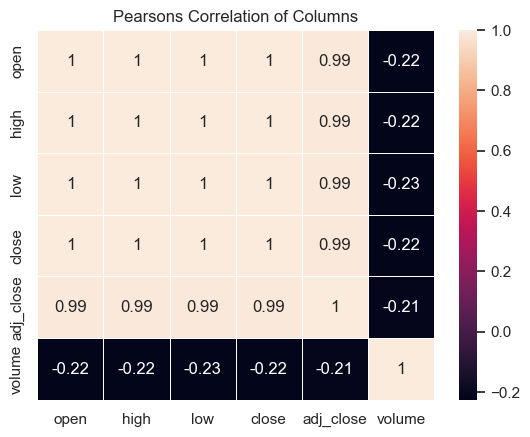

In [80]:
get_categories(df)

In [81]:
df.head()

stock_symbol        date      open      high       low     close  adj_close  \
0         AAPL  2010-01-04  7.622500  7.660714  7.585000  7.643214   6.515213   
1         AAPL  2010-01-05  7.664286  7.699643  7.616071  7.656429   6.526476   
2         AAPL  2010-01-06  7.656429  7.686786  7.526786  7.534643   6.422664   
3         AAPL  2010-01-07  7.562500  7.571429  7.466071  7.520714   6.410790   
4         AAPL  2010-01-08  7.510714  7.571429  7.466429  7.570714   6.453412   

      volume  
0  493729600  
1  601904800  
2  552160000  
3  477131200  
4  447610800

In [82]:
df['date'] = pd.to_datetime(df['date'])

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   stock_symbol  45088 non-null  object        
 1   date          45088 non-null  datetime64[ns]
 2   open          45088 non-null  float64       
 3   high          45088 non-null  float64       
 4   low           45088 non-null  float64       
 5   close         45088 non-null  float64       
 6   adj_close     45088 non-null  float64       
 7   volume        45088 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 2.8+ MB


In [84]:
df.set_index(df['date'], inplace=True)
df.drop(columns='date', inplace=True)

In [85]:
df.head()

stock_symbol      open      high       low     close  adj_close  \
date                                                                         
2010-01-04         AAPL  7.622500  7.660714  7.585000  7.643214   6.515213   
2010-01-05         AAPL  7.664286  7.699643  7.616071  7.656429   6.526476   
2010-01-06         AAPL  7.656429  7.686786  7.526786  7.534643   6.422664   
2010-01-07         AAPL  7.562500  7.571429  7.466071  7.520714   6.410790   
2010-01-08         AAPL  7.510714  7.571429  7.466429  7.570714   6.453412   

               volume  
date                   
2010-01-04  493729600  
2010-01-05  601904800  
2010-01-06  552160000  
2010-01-07  477131200  
2010-01-08  447610800

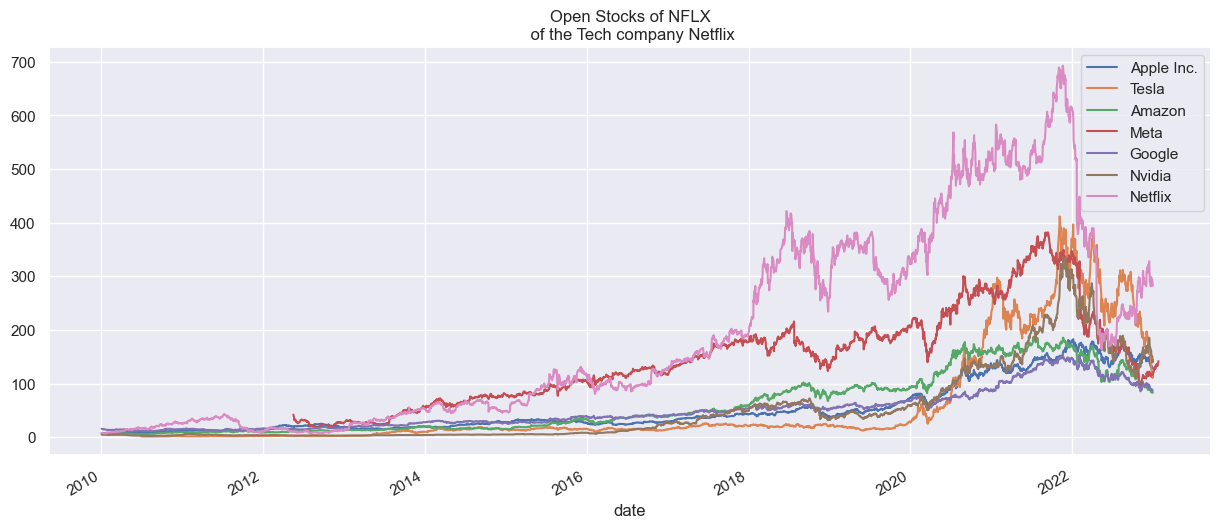

In [86]:
tech_company = {
    'Apple Inc.': 'AAPL',
    'Tesla': 'TSLA',
    'Amazon': 'AMZN',
    'Meta':'META',
    'Google': 'GOOGL',
    'Nvidia': 'NVDA',
    'Netflix': 'NFLX'
}

plt.figure(figsize=(15, 6))

for i in tech_company:

    stock_symbol = df.groupby('stock_symbol').get_group(tech_company.get(i))
    stock_symbol['open'].plot(label=i)
    plt.title('Open Stocks of ' + tech_company.get(i) + '\n of the Tech company ' + i)
    plt.legend(loc='best')
    
    # break
                                                   

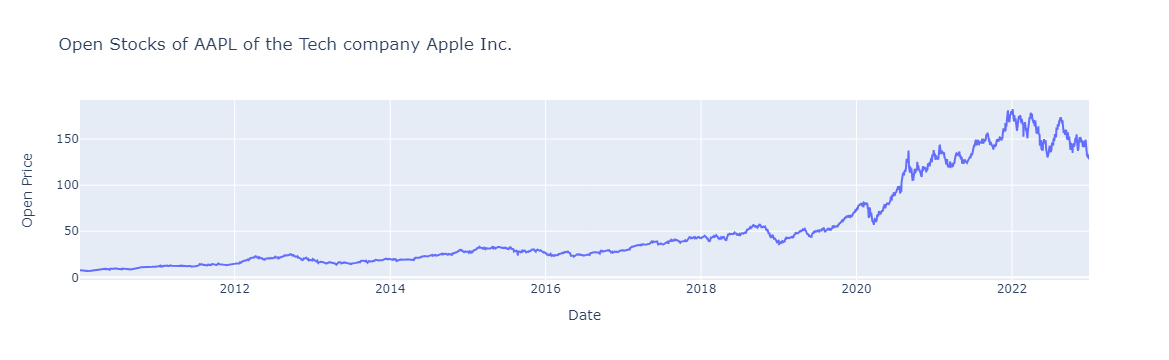

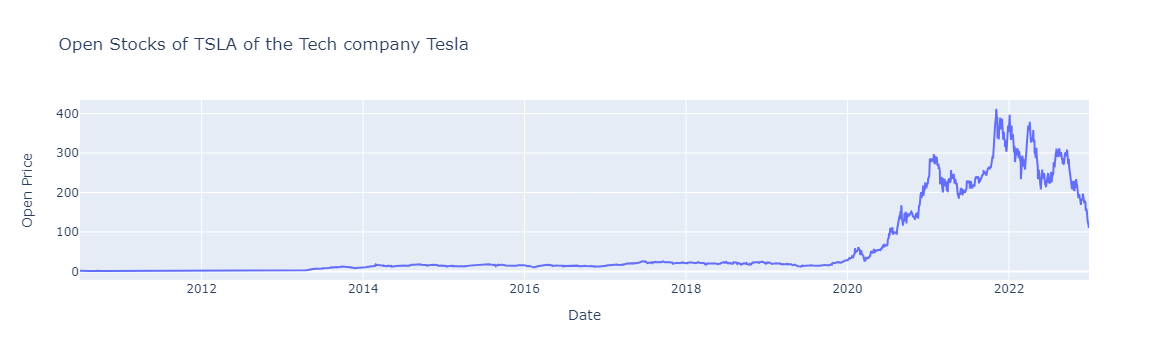

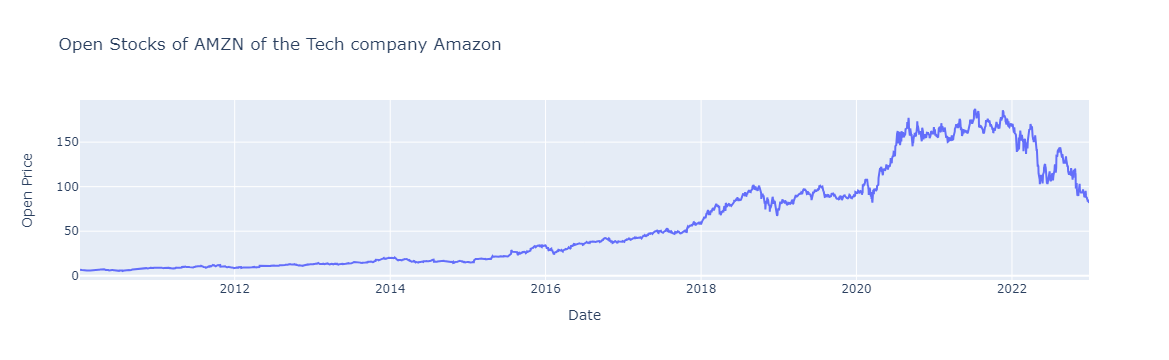

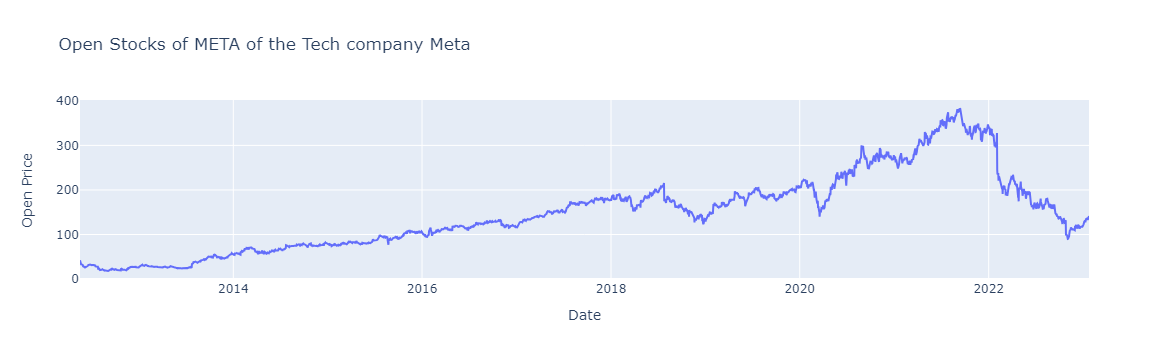

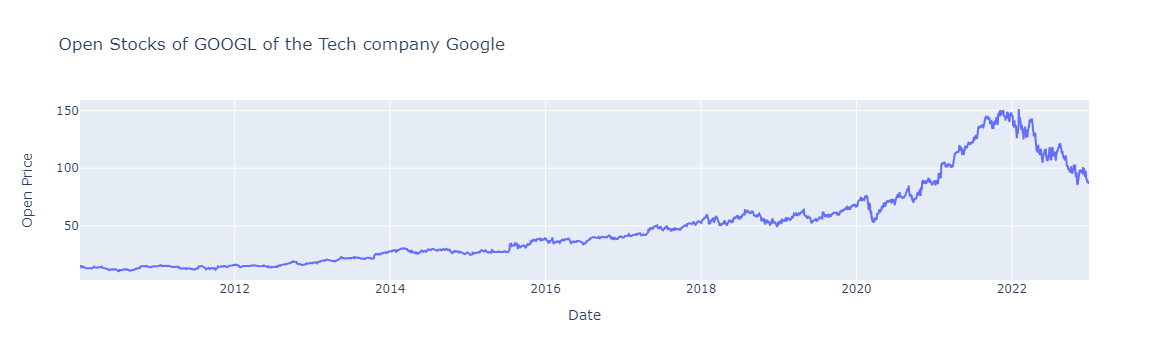

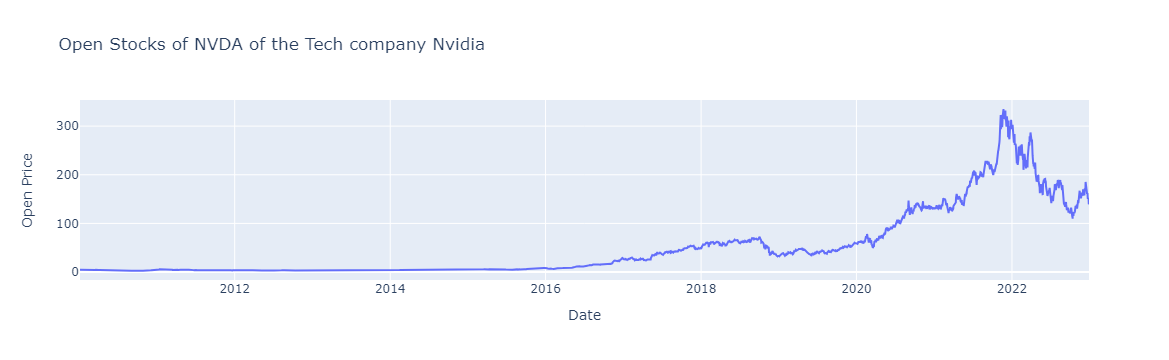

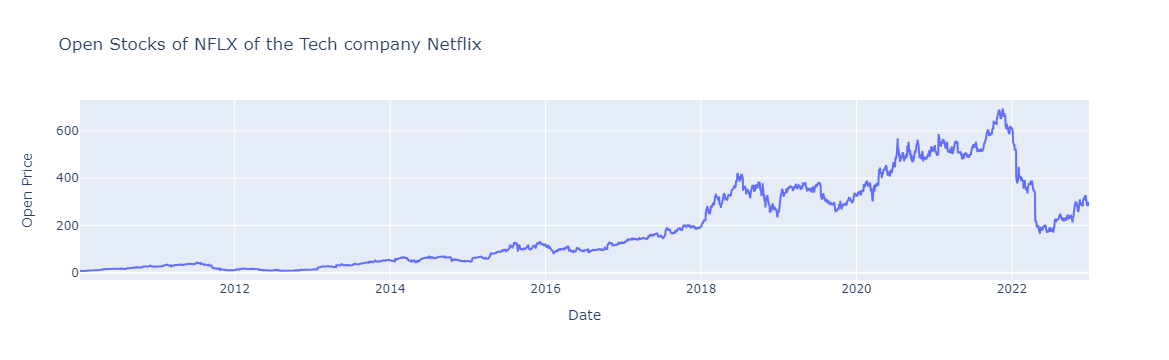

In [87]:
for i in tech_company:
    # Grouping data for each tech company
    stock_symbol = df.groupby('stock_symbol').get_group(tech_company.get(i))
    
    # Creating a Plotly figure
    fig = go.Figure()
    
    # Adding a trace for the company's open stock prices
    fig.add_trace(go.Scatter(x=stock_symbol.index, y=stock_symbol['open'], mode='lines', name=i))
    
    # Setting the title and labels
    fig.update_layout(
        title=f'Open Stocks of {tech_company.get(i)} of the Tech company {i}',
        xaxis_title='Date',
        yaxis_title='Open Price',
        legend_title='Company'
    )
    
    # Display the figure
    fig.show()

In [88]:
stock_symbol

stock_symbol        open        high         low       close  \
date                                                                      
2010-01-04         NFLX    7.931429    7.961429    7.565714    7.640000   
2010-01-05         NFLX    7.652857    7.657143    7.258571    7.358571   
2010-01-06         NFLX    7.361429    7.672857    7.197143    7.617143   
2010-01-07         NFLX    7.731429    7.757143    7.462857    7.485714   
2010-01-08         NFLX    7.498571    7.742857    7.465714    7.614286   
...                 ...         ...         ...         ...         ...   
2022-12-22         NFLX  298.089996  298.880005  290.809998  297.750000   
2022-12-23         NFLX  296.179993  298.459991  291.910004  294.959991   
2022-12-27         NFLX  293.190002  293.570007  282.130005  284.170013   
2022-12-28         NFLX  281.920013  285.190002  273.410004  276.880005   
2022-12-29         NFLX  283.179993  295.500000  281.010010  291.119995   

             adj_close    volume  
date                              
2010-01-04    7.640000  17239600  
2010-01-05    7.358571  23753100  
2010-01-06    7.617143  23290400  
2010-01-07    7.485714   9955400  
2010-01-08    7.614286   8180900  
...                ...       ...  
2022-12-22  297.750000   7856200  
2022-12-23  294.959991   4251100  
2022-12-27  284.170013   5778100  
2022-12-28  276.880005   5964400  
2022-12-29  291.119995   9588500  

[3271 rows x 7 columns]

In [89]:
df.head()

stock_symbol      open      high       low     close  adj_close  \
date                                                                         
2010-01-04         AAPL  7.622500  7.660714  7.585000  7.643214   6.515213   
2010-01-05         AAPL  7.664286  7.699643  7.616071  7.656429   6.526476   
2010-01-06         AAPL  7.656429  7.686786  7.526786  7.534643   6.422664   
2010-01-07         AAPL  7.562500  7.571429  7.466071  7.520714   6.410790   
2010-01-08         AAPL  7.510714  7.571429  7.466429  7.570714   6.453412   

               volume  
date                   
2010-01-04  493729600  
2010-01-05  601904800  
2010-01-06  552160000  
2010-01-07  477131200  
2010-01-08  447610800

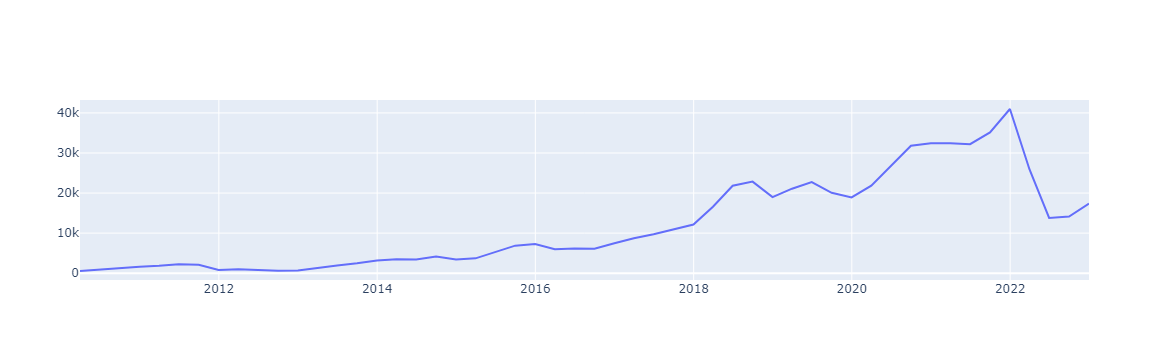

In [90]:
stock_ticker = df.groupby('stock_symbol').get_group('NFLX')
stock_resample = stock_ticker.resample('Q').agg({'open':'sum'})


fig = go.Figure()
    
# Adding a trace for the company's open stock prices
fig.add_trace(go.Scatter(x=stock_resample.index, y=stock_resample['open'], mode='lines', name='Netflix'))

<Axes: xlabel='open', ylabel='Count'>

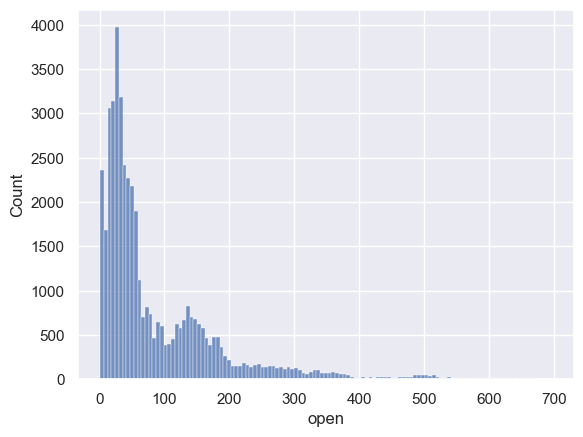

In [91]:
sb.histplot(df['open'])

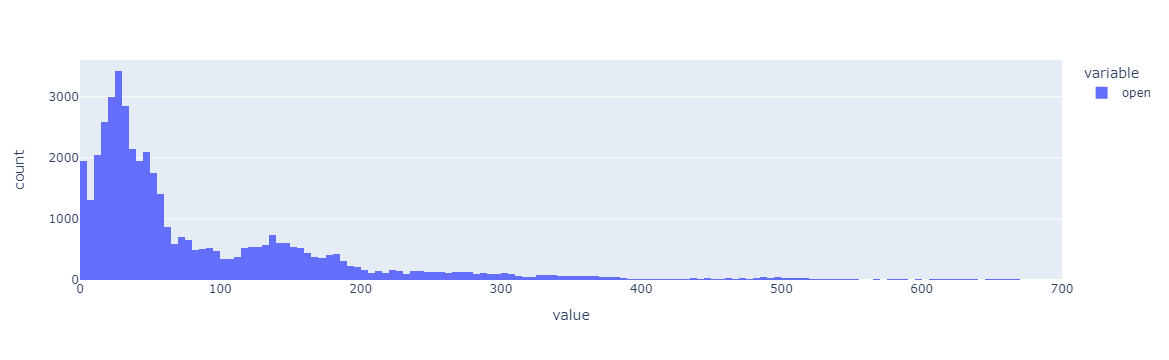

In [92]:
px.histogram(df['open'])
# px.histogram(df['close'], color='close')

In [93]:
df.reset_index(inplace=True)

In [94]:
df['date'] = pd.to_datetime(df['date'])
date  = df['date'].dt.date
df['date'].dtype

dtype('<M8[ns]')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          45088 non-null  datetime64[ns]
 1   stock_symbol  45088 non-null  object        
 2   open          45088 non-null  float64       
 3   high          45088 non-null  float64       
 4   low           45088 non-null  float64       
 5   close         45088 non-null  float64       
 6   adj_close     45088 non-null  float64       
 7   volume        45088 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 2.8+ MB


In [96]:
stock_company = df['stock_symbol'].unique()

In [97]:
company_group = df.groupby('stock_symbol').get_group('AAPL')

	# z = np.random.poisson(size=(len(company_group['stock_symbol']), len(company_group['date'])))
	
pivot_df = company_group.pivot(index='stock_symbol', columns='date', values='adj_close')
print(pivot_df)

date          2010-01-04  2010-01-05  2010-01-06  2010-01-07  2010-01-08  \
stock_symbol                                                               
AAPL            6.515213    6.526476    6.422664     6.41079    6.453412   

date          2010-01-11  2010-01-12  2010-01-13  2010-01-14  2010-01-15  \
stock_symbol                                                               
AAPL            6.396483    6.323721    6.412922    6.375781    6.269228   

date          2010-01-19  2010-01-20  2010-01-21  2010-01-22  2010-01-25  \
stock_symbol                                                               
AAPL            6.546568    6.445801    6.334377    6.020202    6.182159   

date          2010-01-26  2010-01-27  2010-01-28  2010-01-29  2010-02-01  \
stock_symbol                                                               
AAPL            6.269532    6.328594    6.067085    5.846978    5.928262   

date          2010-02-02  2010-02-03  2010-02-04  2010-02-05  2010-02-08  \
stock_sy

In [98]:
df.head()

date stock_symbol      open      high       low     close  adj_close  \
0 2010-01-04         AAPL  7.622500  7.660714  7.585000  7.643214   6.515213   
1 2010-01-05         AAPL  7.664286  7.699643  7.616071  7.656429   6.526476   
2 2010-01-06         AAPL  7.656429  7.686786  7.526786  7.534643   6.422664   
3 2010-01-07         AAPL  7.562500  7.571429  7.466071  7.520714   6.410790   
4 2010-01-08         AAPL  7.510714  7.571429  7.466429  7.570714   6.453412   

      volume  
0  493729600  
1  601904800  
2  552160000  
3  477131200  
4  447610800

In [99]:
df.head()

date stock_symbol      open      high       low     close  adj_close  \
0 2010-01-04         AAPL  7.622500  7.660714  7.585000  7.643214   6.515213   
1 2010-01-05         AAPL  7.664286  7.699643  7.616071  7.656429   6.526476   
2 2010-01-06         AAPL  7.656429  7.686786  7.526786  7.534643   6.422664   
3 2010-01-07         AAPL  7.562500  7.571429  7.466071  7.520714   6.410790   
4 2010-01-08         AAPL  7.510714  7.571429  7.466429  7.570714   6.453412   

      volume  
0  493729600  
1  601904800  
2  552160000  
3  477131200  
4  447610800

In [100]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error

20:44:30 - cmdstanpy - INFO - Chain [1] start processing
20:45:02 - cmdstanpy - INFO - Chain [1] done processing


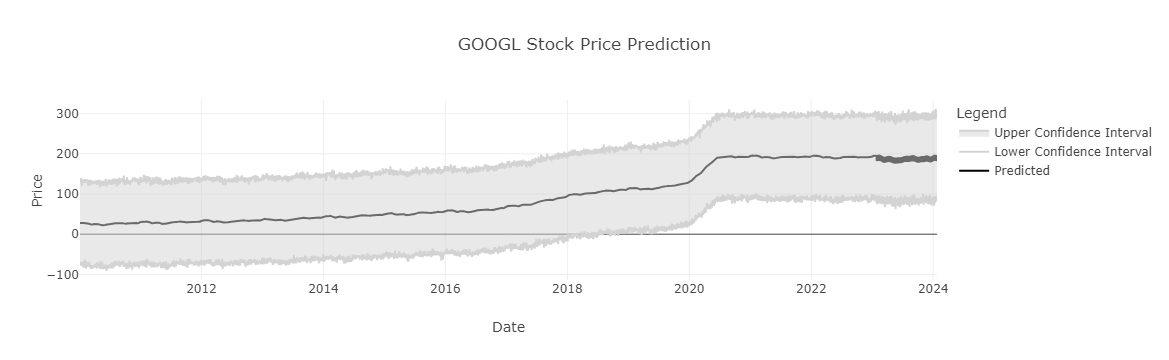

In [151]:
import streamlit as st
import pandas as pd
import yfinance as yf
from prophet import Prophet
import plotly.graph_objs as go

# Step 1: Data Collection
# Replace 'AAPL' with your desired stock symbol
stock_symbol = 'GOOGL'
# data = yf.download(stock_symbol, start='2020-01-01', end='2023-12-31')
data = pd.read_csv(r"D:\Open Classroom\Datasets\Big Tech Giants Stock Price Data\big_tech_stock_prices.csv")

# Step 2: Data Preprocessing
# Reset index and rename columns for Prophet
data.reset_index(inplace=True)
data.rename(columns={'date': 'ds', 'close': 'y'}, inplace=True)

# Step 3: Train the model
model = Prophet()
model.fit(data)

# Step 4: Make future predictions
future = model.make_future_dataframe(periods=365)  # Predict 1 year into the future
forecast = model.predict(future)

# Step 5: Visualization
# Plot the predictions
fig = go.Figure()

# Add historical data
# fig.add_trace(go.Scatter(x=data['ds'], y=data['y'], mode='lines', name='Actual', fill='tonext'))

# Add forecasted data
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Predicted'))

# Add prediction intervals
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_lower'], fill=None, mode='lines', line_color='lightgrey', name='Lower Confidence Interval'))
fig.add_trace(go.Scatter(x=forecast['ds'], y=forecast['yhat_upper'], fill='tonexty', mode='lines', line_color='lightgrey', name='Upper Confidence Interval'))

# Update layout
fig.update_layout(
    title=f'{stock_symbol} Stock Price Prediction',
    xaxis_title='Date',
    yaxis_title='Price',
    legend_title='Legend'
)

# Display the plot in Streamlit
fig.show()


In [101]:
google = df.groupby('stock_symbol').get_group('GOOGL')
google['date'].max()

Timestamp('2022-12-29 00:00:00')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          45088 non-null  datetime64[ns]
 1   stock_symbol  45088 non-null  object        
 2   open          45088 non-null  float64       
 3   high          45088 non-null  float64       
 4   low           45088 non-null  float64       
 5   close         45088 non-null  float64       
 6   adj_close     45088 non-null  float64       
 7   volume        45088 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 2.8+ MB


In [103]:
# df['date'] = df.set_index(df['date'], inplace=True)

In [104]:

x = df.drop(columns=['volume', 'date', 'stock_symbol', 'volume'])
y = df['volume']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Keep the Date series for plotting
x_test_dates = df.loc[x_test.index, 'date']

# instance of the models
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
dtr = DecisionTreeRegressor(random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

# fit the models
rfr.fit(x_train, y_train)
dtr.fit(x_train, y_train)
xgb.fit(x_train, y_train)
gbr.fit(x_train, y_train)

# predict the target variable 
rfr_pred = rfr.predict(x_test)
dtr_pred = dtr.predict(x_test)
xgb_pred = xgb.predict(x_test)
gbr_pred = gbr.predict(x_test)



In [105]:
print(f'Mean Squared Error for Random Forest Regressor Model: {mean_squared_error(y_test, rfr_pred, squared=False)}')
print(f'Mean Squared Error for Decision Tree Regressor Model: {mean_squared_error(y_test, dtr_pred, squared=False)}')
print(f'Mean Squared Error for XGBoost Regressor Model: {mean_squared_error(y_test, xgb_pred, squared=False)}')
print(f'Mean Squared Error for Gradient Boost Regressor Model: {mean_squared_error(y_test, gbr_pred, squared=False)}')
print('')
print('The smaller the MSE, the better the models predictive accuracy. Model Selection: In cases where multiple models are considered for a specific problem, the one with the lowest MSE is often preferred as it demonstrates better fitting to the data.')

Mean Squared Error for Random Forest Regressor Model: 52804010.6352926
Mean Squared Error for Decision Tree Regressor Model: 68217683.34161371
Mean Squared Error for XGBoost Regressor Model: 57211280.65312993
Mean Squared Error for Gradient Boost Regressor Model: 69788328.8676729

The smaller the MSE, the better the models predictive accuracy. Model Selection: In cases where multiple models are considered for a specific problem, the one with the lowest MSE is often preferred as it demonstrates better fitting to the data.


In [106]:
df.head()

date stock_symbol      open      high       low     close  adj_close  \
0 2010-01-04         AAPL  7.622500  7.660714  7.585000  7.643214   6.515213   
1 2010-01-05         AAPL  7.664286  7.699643  7.616071  7.656429   6.526476   
2 2010-01-06         AAPL  7.656429  7.686786  7.526786  7.534643   6.422664   
3 2010-01-07         AAPL  7.562500  7.571429  7.466071  7.520714   6.410790   
4 2010-01-08         AAPL  7.510714  7.571429  7.466429  7.570714   6.453412   

      volume  
0  493729600  
1  601904800  
2  552160000  
3  477131200  
4  447610800

In [107]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [108]:
df.head()

date stock_symbol      open      high       low     close  adj_close  \
0 2010-01-04         AAPL  7.622500  7.660714  7.585000  7.643214   6.515213   
1 2010-01-05         AAPL  7.664286  7.699643  7.616071  7.656429   6.526476   
2 2010-01-06         AAPL  7.656429  7.686786  7.526786  7.534643   6.422664   
3 2010-01-07         AAPL  7.562500  7.571429  7.466071  7.520714   6.410790   
4 2010-01-08         AAPL  7.510714  7.571429  7.466429  7.570714   6.453412   

      volume  year  month  day  
0  493729600  2010      1    4  
1  601904800  2010      1    5  
2  552160000  2010      1    6  
3  477131200  2010      1    7  
4  447610800  2010      1    8

In [109]:


ticker = df.groupby('stock_symbol').get_group('GOOGL')


features = ['open', 'close', 'low', 'adj_close', 'year', 'month', 'day']

x = ticker[features]
y = ticker['high']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Keep the Date series for plotting
x_test_dates = ticker.loc[x_test.index, 'date']

# instance of the models
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
dtr = DecisionTreeRegressor(random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)

# fit the models
rfr.fit(x_train, y_train)
dtr.fit(x_train, y_train)
xgb.fit(x_train, y_train)
gbr.fit(x_train, y_train)

# predict the target variable 
rfr_pred = rfr.predict(x_test)
dtr_pred = dtr.predict(x_test)
xgb_pred = xgb.predict(x_test)
gbr_pred = gbr.predict(x_test)

# metrics
# print(f'Classification Report for Random Forest Regressor \n {classification_report(rfr_pred)}')
print(f'Mean Squared Error for Random Forest Regressor Model: {mean_squared_error(y_test, rfr_pred, squared=False)}')

Mean Squared Error for Random Forest Regressor Model: 0.3426809196038941


In [110]:
print(f'Mean Squared Error for Random Forest Regressor Model: {mean_squared_error(y_test, rfr_pred, squared=False)}')
print(f'Mean Squared Error for Decision Tree Regressor Model: {mean_squared_error(y_test, dtr_pred, squared=False)}')
print(f'Mean Squared Error for XGBoost Regressor Model: {mean_squared_error(y_test, xgb_pred, squared=False)}')
print(f'Mean Squared Error for Gradient Boost Regressor Model: {mean_squared_error(y_test, gbr_pred, squared=False)}')
print('')
print('The smaller the MSE, the better the models predictive accuracy. Model Selection: In cases where multiple models are considered for a specific problem, the one with the lowest MSE is often preferred as it demonstrates better fitting to the data.')

Mean Squared Error for Random Forest Regressor Model: 0.3426809196038941
Mean Squared Error for Decision Tree Regressor Model: 0.5516787816639679
Mean Squared Error for XGBoost Regressor Model: 0.48782325834632945
Mean Squared Error for Gradient Boost Regressor Model: 0.4862419855935758

The smaller the MSE, the better the models predictive accuracy. Model Selection: In cases where multiple models are considered for a specific problem, the one with the lowest MSE is often preferred as it demonstrates better fitting to the data.


Root Mean Squared Error: 0.41397867327953647


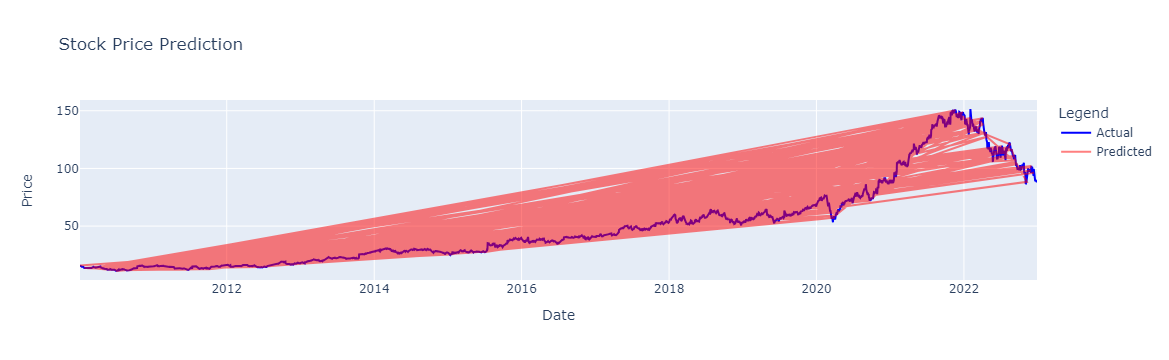

In [111]:
# Combine predictions
final_pred = 0.5 * rfr_pred + 0.5 * dtr_pred

# Calculate error
error = mean_squared_error(y_test, final_pred, squared=False)

# Display error
print(f"Root Mean Squared Error: {error}")

# Plot actual vs predicted prices
fig = go.Figure()
fig.add_trace(go.Scatter(x=ticker['date'], y=ticker['high'], mode='lines', name='Actual', line_color='blue'))
fig.add_trace(go.Scatter(x=x_test_dates, y=final_pred, mode='lines', name='Predicted', line_color='red', opacity=0.5))

fig.update_layout(
    title=f'Stock Price Prediction',
    xaxis_title='Date',
    yaxis_title='Price',
    legend_title='Legend'
)

fig.show()

In [112]:
x_train

open       close         low   adj_close  year  month  day
17145   20.077578   19.789040   19.782032   19.789040  2013      2   25
19317  139.576996  139.785507  139.217499  139.785507  2021     10    8
17377   28.180681   27.558308   27.083834   27.558308  2014      1   27
17380   28.653654   28.413162   28.209459   28.413162  2014      1   30
19346  148.241501  149.838501  147.884506  149.838501  2021     11   18
...           ...         ...         ...         ...   ...    ...  ...
17450   26.591999   26.921499   26.375500   26.921499  2014      5   12
17485   29.382500   29.574499   29.314501   29.574499  2014      7    1
17649   26.922001   27.366501   26.900499   27.366501  2015      2   25
17215   21.584333   21.514013   21.449699   21.514013  2013      6    5
19529  120.260002  121.680000  119.459999  121.680000  2022      8   12

[2616 rows x 7 columns]

In [113]:
x_test['predictions'] = final_pred

In [114]:
x_test.head(20)

open       close         low   adj_close  year  month  day  \
17999   37.049999   36.781502   36.731998   36.781502  2016      7   15   
16489   11.739740   11.501752   11.499499   11.501752  2010      7   16   
16766   12.495996   12.285285   12.283784   12.285285  2011      8   19   
16558   15.313313   15.328579   15.266517   15.328579  2010     10   22   
17514   28.750000   28.606001   28.495501   28.606001  2014      8   12   
17733   28.014999   27.897499   27.872999   27.897499  2015      6   25   
17711   27.629000   27.359501   27.148500   27.359501  2015      5   26   
19319  139.479996  136.449005  135.759995  136.449005  2021     10   12   
16818   14.637137   14.635135   14.526527   14.635135  2011     11    2   
16646   15.459960   15.034034   14.997497   15.034034  2011      3    1   
18233   48.765499   48.449501   48.410000   48.449501  2017      6   20   
18267   47.214500   47.209499   47.124001   47.209499  2017      8    8   
17397   30.428928   30.530531   30.290791   30.530531  2014      2   25   
18942   62.325500   62.865002   61.700001   62.865002  2020      4   15   
17292   22.184685   22.193193   22.057056   22.193193  2013      9   24   
17158   20.695444   20.559059   20.455206   20.559059  2013      3   14   
18946   62.135502   60.608002   60.250000   60.608002  2020      4   21   
18246   47.097500   47.549999   47.097500   47.549999  2017      7   10   
18222   49.894501   50.194000   49.772499   50.194000  2017      6    5   
16618   16.069069   15.809560   15.757257   15.809560  2011      1   19   

       predictions  
17999    37.296470  
16489    11.764024  
16766    12.540556  
16558    15.458143  
17514    28.956991  
17733    28.254375  
17711    27.636771  
19319   138.753463  
16818    14.730190  
16646    15.519477  
18233    48.959838  
18267    47.464916  
17397    30.314411  
18942    62.859347  
17292    22.304115  
17158    20.625336  
18946    62.274684  
18246    47.682785  
18222    50.232997  
16618    16.063250

In [115]:
df.head()

date stock_symbol      open      high       low     close  adj_close  \
0 2010-01-04         AAPL  7.622500  7.660714  7.585000  7.643214   6.515213   
1 2010-01-05         AAPL  7.664286  7.699643  7.616071  7.656429   6.526476   
2 2010-01-06         AAPL  7.656429  7.686786  7.526786  7.534643   6.422664   
3 2010-01-07         AAPL  7.562500  7.571429  7.466071  7.520714   6.410790   
4 2010-01-08         AAPL  7.510714  7.571429  7.466429  7.570714   6.453412   

      volume  year  month  day  
0  493729600  2010      1    4  
1  601904800  2010      1    5  
2  552160000  2010      1    6  
3  477131200  2010      1    7  
4  447610800  2010      1    8

In [116]:
df_copy = df.copy()


In [117]:
df_copy.set_index('date', inplace=True)

In [118]:
df_copy.head()

stock_symbol      open      high       low     close  adj_close  \
date                                                                         
2010-01-04         AAPL  7.622500  7.660714  7.585000  7.643214   6.515213   
2010-01-05         AAPL  7.664286  7.699643  7.616071  7.656429   6.526476   
2010-01-06         AAPL  7.656429  7.686786  7.526786  7.534643   6.422664   
2010-01-07         AAPL  7.562500  7.571429  7.466071  7.520714   6.410790   
2010-01-08         AAPL  7.510714  7.571429  7.466429  7.570714   6.453412   

               volume  year  month  day  
date                                     
2010-01-04  493729600  2010      1    4  
2010-01-05  601904800  2010      1    5  
2010-01-06  552160000  2010      1    6  
2010-01-07  477131200  2010      1    7  
2010-01-08  447610800  2010      1    8

In [119]:
grp_stock = df_copy.groupby('stock_symbol').get_group('GOOGL').head(10)
# grp_stock['open'].mean().plot()

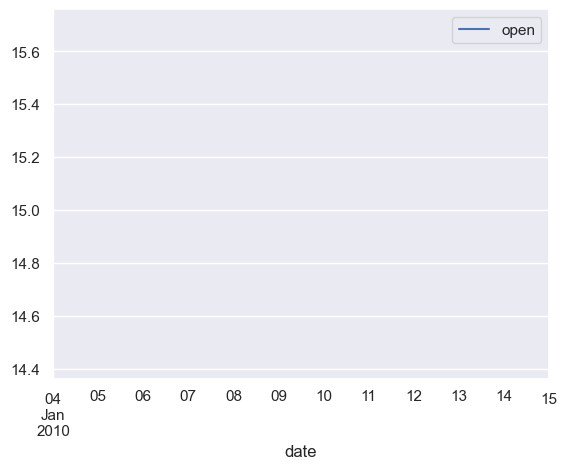

In [120]:
resample_stock = grp_stock.resample('s').agg({'open':'mean'}).plot()

In [121]:
import yfinance as yf
tk = yf.Tickers('msft aapl goog tsla scom coop kcb eqt kq nse bat bamb totl nmg nbk dtk')

In [122]:
symbol = []
for i in tk.symbols:
    symbol.append(i)
print(symbol)

['MSFT', 'AAPL', 'GOOG', 'TSLA', 'SCOM', 'COOP', 'KCB', 'EQT', 'KQ', 'NSE', 'BAT', 'BAMB', 'TOTL', 'NMG', 'NBK', 'DTK']


In [126]:
df.iloc[0]

date            2010-01-04 00:00:00
stock_symbol                   AAPL
open                         7.6225
high                       7.660714
low                           7.585
close                      7.643214
adj_close                  6.515213
volume                    493729600
year                           2010
month                             1
day                               4
Name: 0, dtype: object

In [133]:
df = df.sort_values(by='date', ascending = True)
df.head()

date stock_symbol       open       high      low      close  \
0     2010-01-04         AAPL   7.622500   7.660714   7.5850   7.643214   
6542  2010-01-04         AMZN   6.812500   6.830500   6.6570   6.695000   
38669 2010-01-04         ORCL  24.660000  25.190001  24.6600  24.850000   
35398 2010-01-04         NVDA   4.627500   4.655000   4.5275   4.622500   
28856 2010-01-04         MSFT  30.620001  31.100000  30.5900  30.950001   

       adj_close     volume  year  month  day  
0       6.515213  493729600  2010      1    4  
6542    6.695000  151998000  2010      1    4  
38669  20.751328   26795000  2010      1    4  
35398   4.242311   80020400  2010      1    4  
28856  23.683071   38409100  2010      1    4

In [142]:
grp_stock = grp_stock.sort_values(by='date', ascending=True)
grp_stock.head()

stock_symbol       open       high        low      close  \
date                                                                  
2010-01-04        GOOGL  15.689439  15.753504  15.621622  15.684434   
2010-01-05        GOOGL  15.695195  15.711712  15.554054  15.615365   
2010-01-06        GOOGL  15.662162  15.662162  15.174174  15.221722   
2010-01-07        GOOGL  15.250250  15.265265  14.831081  14.867367   
2010-01-08        GOOGL  14.814815  15.096346  14.742492  15.065566   

            adj_close     volume  year  month  day  
date                                                
2010-01-04  15.684434   78169752  2010      1    4  
2010-01-05  15.615365  120067812  2010      1    5  
2010-01-06  15.221722  158988852  2010      1    6  
2010-01-07  14.867367  256315428  2010      1    7  
2010-01-08  15.065566  188783028  2010      1    8

In [146]:
grp_stock['high'].iloc[0] -  grp_stock['high'].iloc[1]

0.04179199999999916

In [161]:
import africastalking

In [191]:

username='antonie'
api_key='atsk_98beab08bf9c113f6fa4ca61a6fd33f86c70a846e2b2893d87dacc61a284ce5a59f1d4fa'


africastalking.initialize(
    username='antonie',
    api_key='atsk_98beab08bf9c113f6fa4ca61a6fd33f86c70a846e2b2893d87dacc61a284ce5a59f1d4fa'
)

sms = africastalking.SMS

sms1 = africastalking.SMSService
print(sms1)

# print(sms.send('Hey There', ["+254743158232"] , 'XXYYZZ'))


def sending(sms_service):
    # Set the numbers in international format
    recipients = ["+254743158232"]
    # Set your message
    message = "Hey AT Ninja!"
    # Set your shortCode or senderId
    sender = "XXYYZZ"
    try:
        response = sms_service.send(message, recipients, sender)
        print (response)
    except Exception as e:
        print (f'Houston, we have a problem: {e}')

sms_service = sms

sending(sms_service)

# print(sending)

<class 'africastalking.SMS.SMSService'>
Houston, we have a problem: 'module' object is not callable


In [199]:
import hiplot as hip
data = [{'dropout':0.1, 'lr': 0.001, 'loss': 10.0, 'optimizer': 'SGD'},
        {'dropout':0.15, 'lr': 0.01, 'loss': 3.5, 'optimizer': 'Adam'},
        {'dropout':0.3, 'lr': 0.1, 'loss': 4.5, 'optimizer': 'Adam'}]
df = pd.read_csv(r"D:\Open Classroom\Datasets\Big Tech Giants Stock Price Data\big_tech_stock_prices.csv")
hip.Experiment.from_iterable(data).display()

<IPython.core.display.Javascript object>

In [196]:
from openai import OpenAI
client = OpenAI()

client.fine_tuning.jobs.create(
  training_file="D:\Downloads\datapackage.json",
  model="gpt-4o-mini"
)


TypeError: 'module' object is not callable